In [20]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
df = pd.read_csv('./dog_data/labels.csv')
train = "./dog_data/train/"
test="./dog_data/test/"

In [22]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import os
# 이미지 경로 및 라벨 로드
img_paths = [os.path.join(train, img_id + '.jpg') for img_id in df['id']]
labels = df['breed'].values

# 이미지 데이터를 숫자 배열로 변환
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# 모든 이미지 데이터를 처리
image_data = [load_and_preprocess_image(img_path) for img_path in img_paths]

# 이미지 데이터를 numpy 배열로 변환
image_data = np.vstack(image_data)

# 이미지 데이터의 shape 확인
print("Image Data Shape:", image_data.shape)


Image Data Shape: (10222, 224, 224, 3)


In [27]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 이미지 데이터를 평탄화하여 2차원으로 변환
image_data_flattened = image_data.reshape(image_data.shape[0], -1)

# T-SNE를 사용하여 2차원으로 축소
tsne = TSNE(n_components=2, random_state=42, perplexity=50, learning_rate=200, n_iter=1000)
image_data_tsne = tsne.fit_transform(image_data_flattened)

# K-평균 클러스터링 수행
n_clusters = 20  # 클러스터 갯수
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(image_data_flattened)


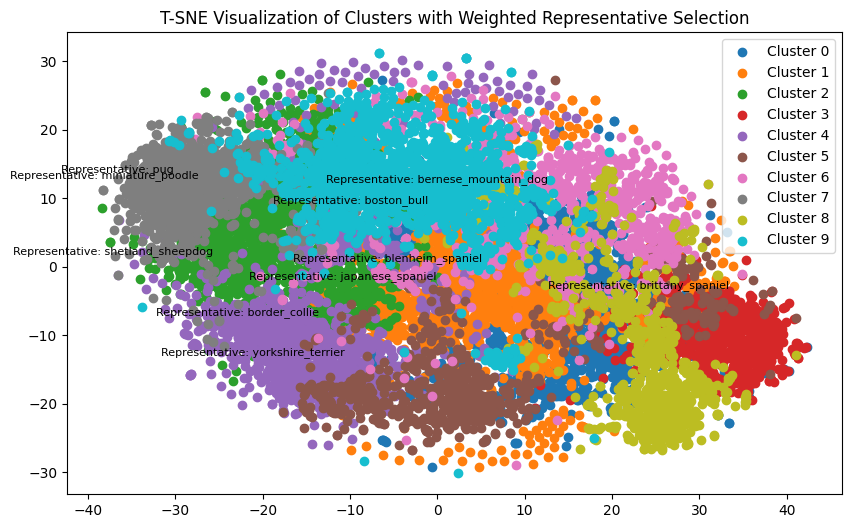

In [25]:
from sklearn.manifold import TSNE

# 각 클러스터의 대표 품종 선택
representative_labels = []
clustered_labels = []  # 각 클러스터에 속한 모든 품종을 저장하기 위한 리스트

for cluster_id in range(n_clusters):
    cluster_indices = (kmeans.labels_ == cluster_id)
    cluster_labels = labels[cluster_indices]

    # LabelEncoder를 사용하여 각 라벨을 정수로 변환
    label_encoder = LabelEncoder()
    cluster_labels_encoded = label_encoder.fit_transform(cluster_labels)

    # 각 라벨의 가중치 계산 (예: 라벨별 데이터의 총 거리)
    label_weights = np.sum((image_data_tsne[cluster_indices] - np.mean(image_data_tsne[cluster_indices], axis=0)) ** 2, axis=1)

    # 가중치가 가장 낮은 라벨을 대표로 선택
    most_weighted_label_index = np.argmin(label_weights)
    most_weighted_label = cluster_labels[most_weighted_label_index]
    representative_labels.append(most_weighted_label)

    # 각 클러스터에 속한 모든 품종을 리스트에 추가
    clustered_labels.append(cluster_labels)

# T-SNE를 사용하여 2차원으로 축소
tsne = TSNE(n_components=2, random_state=42)
image_data_tsne = tsne.fit_transform(image_data_flattened)

# 각 클러스터에 속한 품종을 점으로 시각화
plt.figure(figsize=(10, 6))
for cluster_id in range(n_clusters):
    cluster_indices = (kmeans.labels_ == cluster_id)
    plt.scatter(image_data_tsne[cluster_indices, 0], image_data_tsne[cluster_indices, 1], label=f'Cluster {cluster_id}')

# 각 클러스터의 대표 품종을 표시
for label, xy in zip(representative_labels, image_data_tsne):
    plt.annotate(f'Representative: {label}', xy=xy, fontsize=8, ha='right', va='bottom')

plt.title('T-SNE Visualization of Clusters with Weighted Representative Selection')
plt.legend()
plt.show()

In [26]:
# 대표 품종 리스트 출력
print("Representative Labels:")
for cluster_id, label in enumerate(representative_labels):
    print(f"Cluster {cluster_id}: {label}")


Representative Labels:
Cluster 0: blenheim_spaniel
Cluster 1: shetland_sheepdog
Cluster 2: yorkshire_terrier
Cluster 3: japanese_spaniel
Cluster 4: boston_bull
Cluster 5: brittany_spaniel
Cluster 6: pug
Cluster 7: border_collie
Cluster 8: bernese_mountain_dog
Cluster 9: miniature_poodle
